In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import numpy as np
from numpy import pi,sin,cos,exp,sqrt
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
# Global Experimental parameters
nIter = 10
N = 200 # number of neurons
M = 10 # number of memorys, every trace will be attemped to recall
T_theta = 125 # theta oscillation period in ms
tf = 10*T_theta # integration time for each recall
dt = 1 # timestep for saving results
k_prior = 0.5 # concentration parameter for prior distribution
k_cue0 = 16 # for initial cue distribution
v_noise = 1/8 # for cue noise accumulation, k_cue(t) = 1/( 1/k_cue0 + v_noise*t/T_theta )



In [4]:
# load data
t = np.arange(0,tf,dt)
len_t = len(t)
xMemory = np.empty((nIter,N,M))
xRecalled = np.empty((nIter,N,len_t,M))
xRecalled_n = np.empty((nIter,N,len_t,M))
xNoise = np.empty((nIter,N,len_t+1,M))
for iIter in range(nIter):
    filename = 'Data/Lengyel2005_alwaysUpdateXj_stochasticCue/Lengyel2005_alwaysUpdateXj_stochasticCue_withDynamicWeight_iter%02d.npz'%(iIter)
    loaded = np.load(filename)
    # print(loaded.files)
    xMemory[iIter] = loaded['xMemory']
    xRecalled[iIter] = loaded['xRecalled']
    xNoise[iIter] = loaded['xNoise']
for iIter in range(nIter):
    filename = 'Data/Lengyel2005_alwaysUpdateXj_stochasticCue/Lengyel2005_alwaysUpdateXj_stochasticCue_noDynamicWeight_iter%02d.npz'%(iIter)
    loaded = np.load(filename)
    xRecalled_n[iIter] = loaded['xRecalled']




In [5]:
filename = 'Data/Lengyel2005_alwaysUpdateXj_stochasticCue/ErrorCombined.npz'
loaded = np.load(filename)
xError = loaded['xError']
xError_n = loaded['xError_n']
xError_FF = loaded['xError_FF']


In [6]:
xError_all = np.array([xError,xError_n,xError_FF])
labels = ['dynamic cue weight','fixed cue weight','no synaptic info']
bias = np.mean(xError_all,axis=1)
stdL = np.std(xError_all,axis=1)
dspL = stdL**2 + bias**2
vR   = exp(1j*xError_all)
R    = abs(np.mean(vR,axis=1))
varC = 1-R
dspC = varC + 2*R*(np.sin(bias/2)**2)


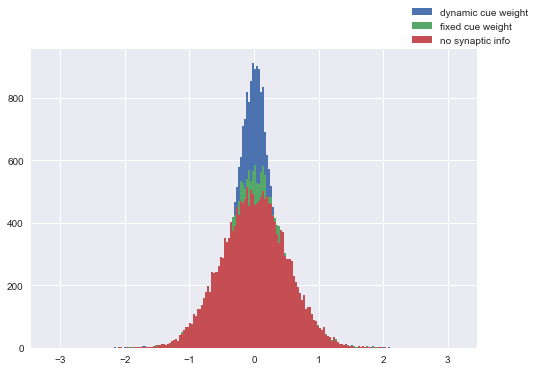

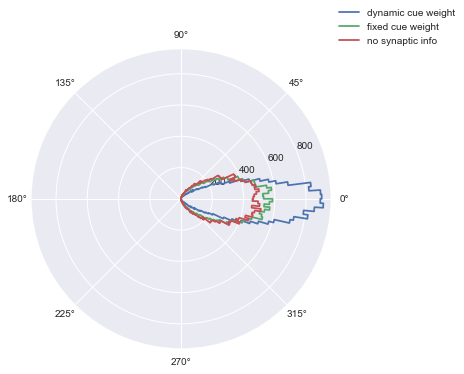

In [7]:
tt = int(200/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()



In [8]:
plt.style.available
plt.style.use('seaborn')


In [9]:
print(plt.style.available)
plt.style.use('seaborn')


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [10]:
print(plt.style.available)
plt.style.use('seaborn-talk')


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


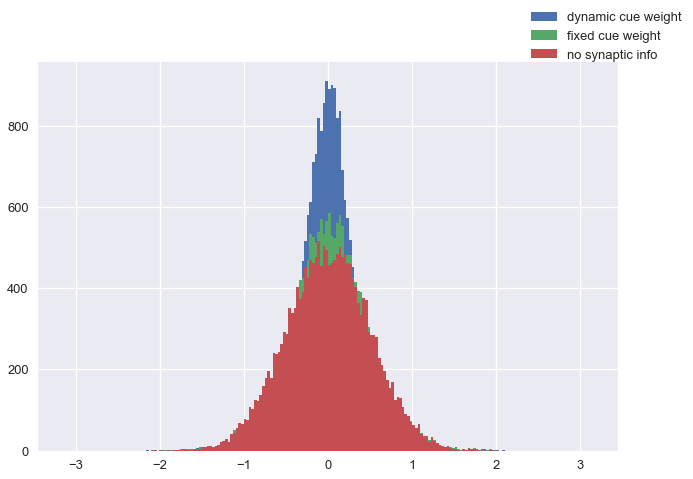

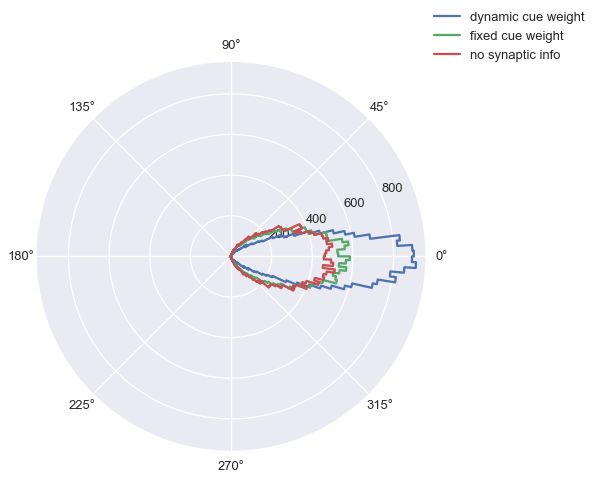

In [11]:
tt = int(200/dt)
hist = [None for _ in range(3)]
fig1,ax1 = plt.subplots()
for m in range(3):
    hist[m],bin_edges,_ = ax1.hist(xError_all[m][:,tt],200,(-pi,pi), label=labels[m])
fig1.legend()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='polar')
for m in range(3):
    ax2.plot(bin_edges,np.append(hist[m],hist[m][0]),drawstyle='steps-pre',label=labels[m])
fig2.legend()



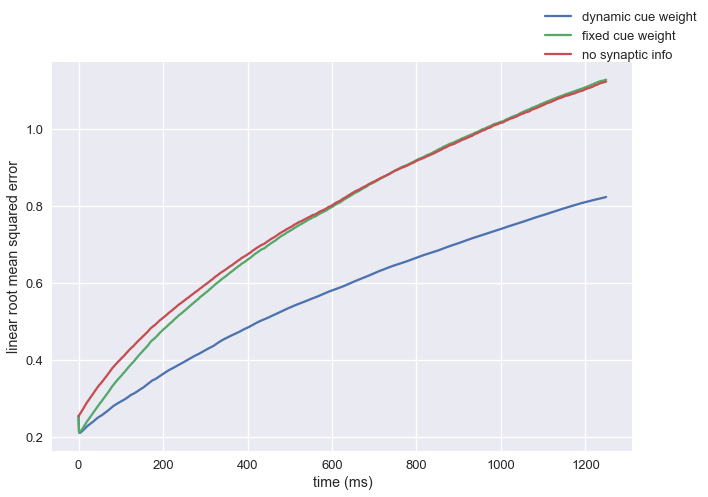

In [12]:
fig,ax = plt.subplots()
for m in range(3):
    ax.plot(t,stdL[m],label=labels[m])
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear root mean squared error')
fig.legend()

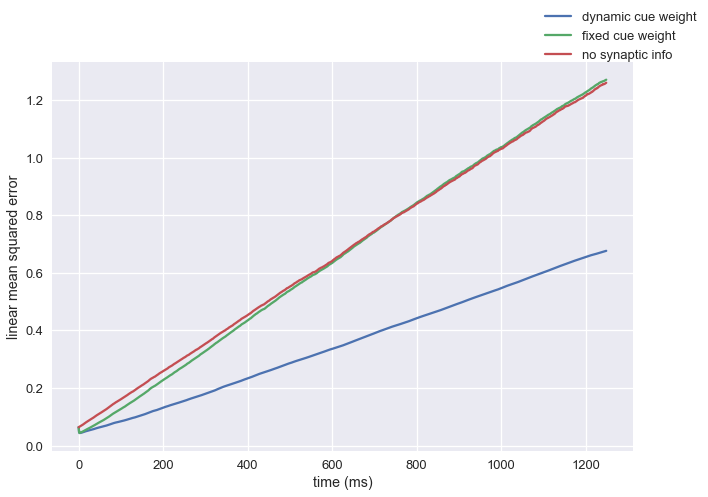

In [13]:
fig,ax = plt.subplots()
for m in range(3):
    ax.plot(t,dspL[m],label=labels[m])
ax.set_xlabel('time (ms)')
ax.set_ylabel('linear mean squared error')
fig.legend()